In [1]:
import pandas as pd 
import numpy as np 
from xgboost import XGBClassifier
import matplotlib.pyplot as plt 
%matplotlib inline 

#데이터 불러오기 
loan_data = pd.read_csv('./data/loanData.csv')
loan_data.tail()

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
609,LA001350,Male,22,Yes,NaN,Graduate,No,43,13650,56,0.0,1.0,759,Urban,1,2,4000,26,1
610,LA001357,Male,24,NaN,NaN,Graduate,No,62,3816,41,754.0,1.0,3190,Urban,1,2,2880,30,1
611,LA001760,Male,25,NaN,NaN,Graduate,No,86,4758,52,0.0,1.0,1747,Semiurban,1,2,2844,34,1
612,LA002943,Male,67,No,NaN,Graduate,No,12,2987,2,0.0,0.0,0,Semiurban,1,2,1760,30,0
613,LA002393,Female,44,NaN,NaN,Graduate,No,94,10047,43,0.0,1.0,1181,Semiurban,2,1,3712,22,1


In [2]:
#특정 칼럼의 값 중복을 제외한 (unique)값을 출력하는 방식 
loan_data['dependents'].unique()

array(['3+', '2', '1', '0', nan], dtype=object)

In [3]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [4]:
loan_data['married'].unique()

array(['Yes', 'No', nan], dtype=object)

In [5]:
loan_data['education'].unique()

array(['Not Graduate', 'Graduate'], dtype=object)

In [6]:
#데이터의 성별 컬럼을 정수형 데이터로 맵핑하는 코드 
gender_mapping = {'Male':1, 'Female':2, np.nan:-1}
loan_data = loan_data.replace({'gender':gender_mapping})

In [7]:
#결과 일부 확인하기 
loan_data.head()

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,1,55,Yes,3+,Not Graduate,No,88,4755,51,0.0,0.0,0,Semiurban,3,8,2090,0,0
1,LA001864,1,68,Yes,3+,Not Graduate,No,14,4931,47,0.0,NaN,0,Semiurban,3,7,5376,24,0
2,LA002536,1,43,Yes,3+,Not Graduate,No,56,3095,33,0.0,1.0,1382,Rural,3,5,3390,33,1
3,LA001264,1,22,Yes,3+,Not Graduate,Yes,46,3333,68,2166.0,NaN,0,Semiurban,2,5,2600,36,1
4,LA001384,1,34,Yes,3+,Not Graduate,No,60,2071,60,754.0,1.0,2756,Semiurban,2,5,2820,53,0


In [8]:
#컬럼 값을 실수형 데이터로 변환하는 코드 
gender_mapping = {'Male':1, 'Female':2, np.nan:-1}
married_mapping = {'No':0, 'Yes':1, np.nan:-1}
dep_mapping = {'0':0, '1':1, '2':2, '3+':3, np.nan:-1}
edu_mapping = {'Graduate':1, 'Not Graduate':0}
emp_mapping = {'No':0, 'Yes':1, np.nan: -1}
prop_mapping = {'Urban':1, 'Rural':3, 'Semiurban':2}

In [9]:
loan_data = loan_data.replace({'married' : married_mapping,
                               'dependents' : dep_mapping,
                               'education' : edu_mapping,
                               'self_employed' : emp_mapping,
                               'property_area' : prop_mapping})

In [10]:
#결과 일부 확인하기 
loan_data.head()

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,1,55,1,3,0,0,88,4755,51,0.0,0.0,0,2,3,8,2090,0,0
1,LA001864,1,68,1,3,0,0,14,4931,47,0.0,NaN,0,2,3,7,5376,24,0
2,LA002536,1,43,1,3,0,0,56,3095,33,0.0,1.0,1382,3,3,5,3390,33,1
3,LA001264,1,22,1,3,0,1,46,3333,68,2166.0,NaN,0,2,2,5,2600,36,1
4,LA001384,1,34,1,3,0,0,60,2071,60,754.0,1.0,2756,2,2,5,2820,53,0


In [11]:
#데이터를 학습용과 테스트용으로 가르는 코드 
from sklearn.model_selection import train_test_split

#id 제외 
X = loan_data.loc[:, 'gender':'loan_term']
y = loan_data.loc[:, 'loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [12]:
#xgboost로 신용 대출 여부를 판별하는 모델을 구축하는 코드 
model = XGBClassifier(
    booster = 'gbtree',
    objective = 'binary:logistic',
)

model.fit(X_train, y_train)

[15:04:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sojihae99/miniconda3/envs/xai/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=32,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
#모델과 테스트 데이터로 정확도를 측정하는 코드 
from sklearn.metrics import accuracy_score 

def calculate_accuracy(model, X_test, y_test):
    #예측하기 
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    #평가하기 
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, X_test, y_test)

Accuracy: 86.18%


0.8617886178861789

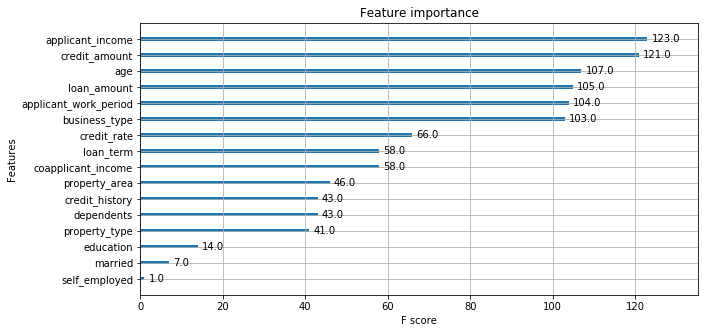

In [14]:
#피쳐 중요도 출력하기 
import xgboost
from matplotlib.pylab import rcParams 

rcParams['figure.figsize'] = 10, 5
xgboost.plot_importance(model)

In [15]:
#shap 기법을 활용해서 사용자 한 명을 분석하는 코드 
import shap 

idx = 13

#13번째 사용자 데이터 출력하기 
print(X_train.iloc[idx, :])

#js 시각화 라이브러리 로드하기 
shap.initjs()

#shap 값으로 모델의 예측 결과 설명하기 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

#설명체의 해석 결과 출력하기 
shap.force_plot(explainer.expected_value, 
                shap_values[idx, :],
                X_train.iloc[idx, :])

gender                      1.0
age                        30.0
married                     1.0
dependents                  0.0
education                   1.0
self_employed               0.0
business_type              74.0
applicant_income         1809.0
applicant_work_period      35.0
coapplicant_income       1868.0
credit_history              1.0
credit_amount            3212.0
property_area               1.0
property_type               1.0
credit_rate                 3.0
loan_amount              2520.0
loan_term                  30.0
Name: 498, dtype: float64


/home/sojihae99/miniconda3/envs/xai/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [16]:
#shap 기법을 활용해서 사용자 한 명을 분석하는 코드 
import shap 

idx = 15

#13번째 사용자 데이터 출력하기 
print(X_train.iloc[idx, :])

#js 시각화 라이브러리 로드하기 
shap.initjs()

#shap 값으로 모델의 예측 결과 설명하기 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

#설명체의 해석 결과 출력하기 
shap.force_plot(explainer.expected_value, 
                shap_values[idx, :],
                X_train.iloc[idx, :])

gender                      1.0
age                        60.0
married                     1.0
dependents                  1.0
education                   1.0
self_employed               0.0
business_type              14.0
applicant_income         6400.0
applicant_work_period      38.0
coapplicant_income       7250.0
credit_history              0.0
credit_amount               0.0
property_area               1.0
property_type               3.0
credit_rate                 7.0
loan_amount              3240.0
loan_term                  28.0
Name: 181, dtype: float64


In [17]:
#모든 학습 데이터에 대해 설명체 전체를 플롯으로 보여주는 코드 
shap.initjs()

#모델이 학습한 결과에 대한 설명체 전체 출력하기 
shap.force_plot(explainer.expected_value, shap_values, X_train)

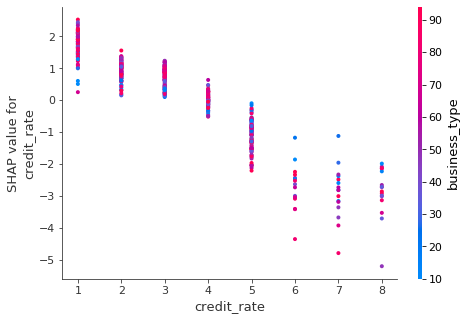

In [18]:
#신용등급 하나의 피쳐에 대해 SHAP 영향력을 출력 
shap.dependence_plot("credit_rate", shap_values, X_train)

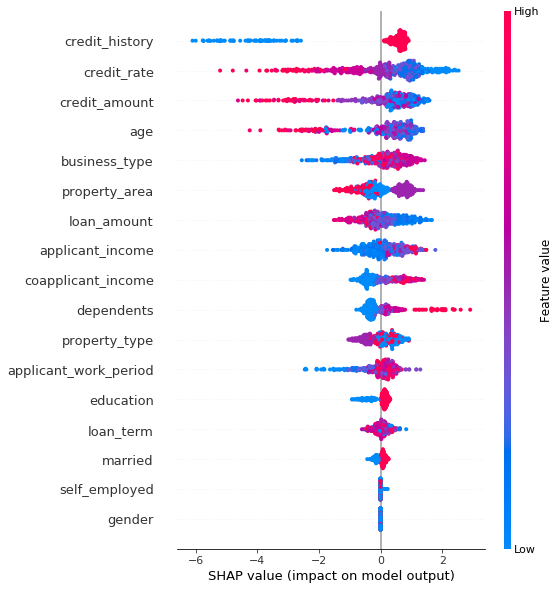

In [19]:
#모든 전체 학습 세트에 대해 섀플리 값을 출력하는 코드 
shap.summary_plot(shap_values, X_train)

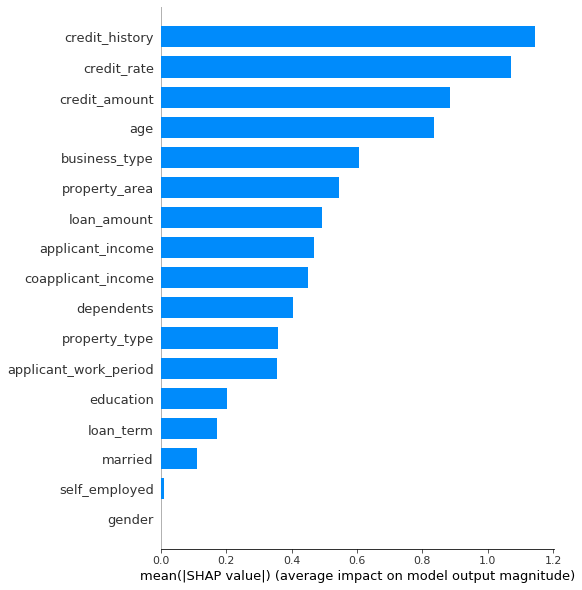

In [20]:
#모든 전체 학습 세트에 대해 섀플리 값을 출력하는 코드 
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [21]:
#대출 심사 데이터에서 학력 피쳐를 삭제하고 모델을 학습시키는 코드 
loan_data = loan_data.drop(columns='education')

#id 제외 
X = loan_data.loc[:, "gender":"loan_term"]
y = loan_data.loc[:, "loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = XGBClassifier(booster = 'gbtree', 
                      objective = 'binary:logistic', 
                      learning_rate = 0.02, 
                      n_estimators = 300, 
                      reg_alpha = 0.7, 
                      reg_lambda = 0.5, 
                      max_depth = 4)

model.fit(X_train, y_train)
calculate_accuracy(model, X_test, y_test)

[15:04:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 85.37%


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


0.8536585365853658